#Testing Time-Series Functions for Future Trends

In [2]:
!pip install yfinance

[*********************100%%**********************]  1 of 1 completed
              Open         High          Low        Close    Adj Close  \
count  2961.000000  2961.000000  2961.000000  2961.000000  2961.000000   
mean     61.729703    62.400946    60.987437    61.664066    48.743798   
std      13.465868    13.530088    13.404025    13.452854     9.938721   
min      23.200001    24.700001    21.600000    24.000000    21.674006   
25%      53.000000    53.500000    52.250000    52.750000    41.900742   
50%      61.750000    62.500000    61.250000    61.750000    46.551224   
75%      70.250000    71.000000    69.500000    70.250000    54.567726   
max     103.000000   105.000000   101.500000   103.000000    84.301094   

             Volume  
count  2.961000e+03  
mean   1.624057e+07  
std    1.116845e+07  
min    0.000000e+00  
25%    9.177900e+06  
50%    1.351060e+07  
75%    1.962780e+07  
max    1.147841e+08  


<ipython-input-3-59a43486a9d1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SMA_50"] = data["Close"].rolling(window=50).mean()
<ipython-input-3-59a43486a9d1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Bollinger_Band_Upper"] = data["Close"] + 2 * data["Close"].std(ddof=1)
<ipython-input-3-59a43486a9d1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

PTTGC data downloaded and analyzed using yfinance!


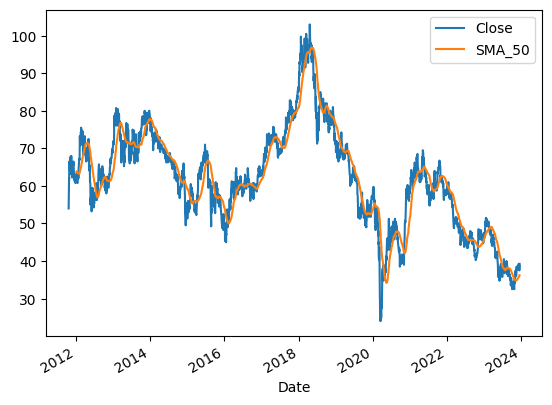

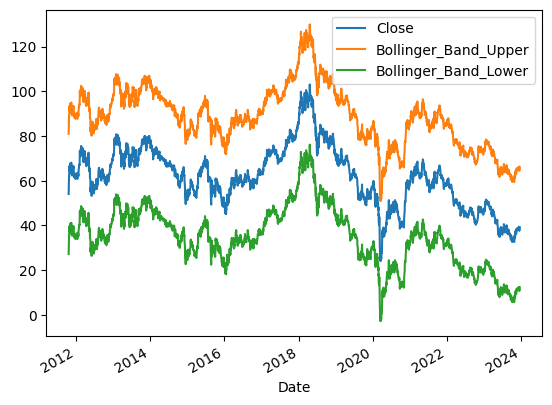

In [3]:
import yfinance as yf
import pandas as pd

# Define symbol and period
symbol = "PTTGC.BK"
period = "max"  # Download all available data

# Download historical data
df = yf.download(symbol, period=period)

# Print basic data statistics
print(df.describe())

# Select specific columns for analysis
data = df[["Close", "Volume"]]

# Calculate and plot simple moving average (SMA) for closing price
data["SMA_50"] = data["Close"].rolling(window=50).mean()
data.plot(y=["Close", "SMA_50"])

# Calculate and plot Bollinger Bands
data["Bollinger_Band_Upper"] = data["Close"] + 2 * data["Close"].std(ddof=1)
data["Bollinger_Band_Lower"] = data["Close"] - 2 * data["Close"].std(ddof=1)
data[["Close", "Bollinger_Band_Upper", "Bollinger_Band_Lower"]].plot()


# Save data to CSV file (optional)
data.to_csv("pttgc_yfinance_data.csv", index=False)

print("PTTGC data downloaded and analyzed using yfinance!")

In [4]:
#Parameter for Prophet
data["ds"] = data.index
data["y"] = df['Close']

data2 = data[["ds","y"]]
data2

,ds,y
Date,,
2011-10-21,2011-10-21,54.00
2011-10-25,2011-10-25,62.00
2011-10-26,2011-10-26,61.75
2011-10-27,2011-10-27,64.25
2011-10-28,2011-10-28,66.50
...,...,...
2023-12-08,2023-12-08,38.75
2023-12-12,2023-12-12,39.00
2023-12-13,2023-12-13,37.50


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhp4i0_g/h3pohius.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhp4i0_g/0q4b1hn7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22382', 'data', 'file=/tmp/tmpxhp4i0_g/h3pohius.json', 'init=/tmp/tmpxhp4i0_g/0q4b1hn7.json', 'output', 'file=/tmp/tmpxhp4i0_g/prophet_model4tfw2sah/prophet_model-20231217151234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:12:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:12:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


PTTGC closing price forecast generated for the next 30 days!


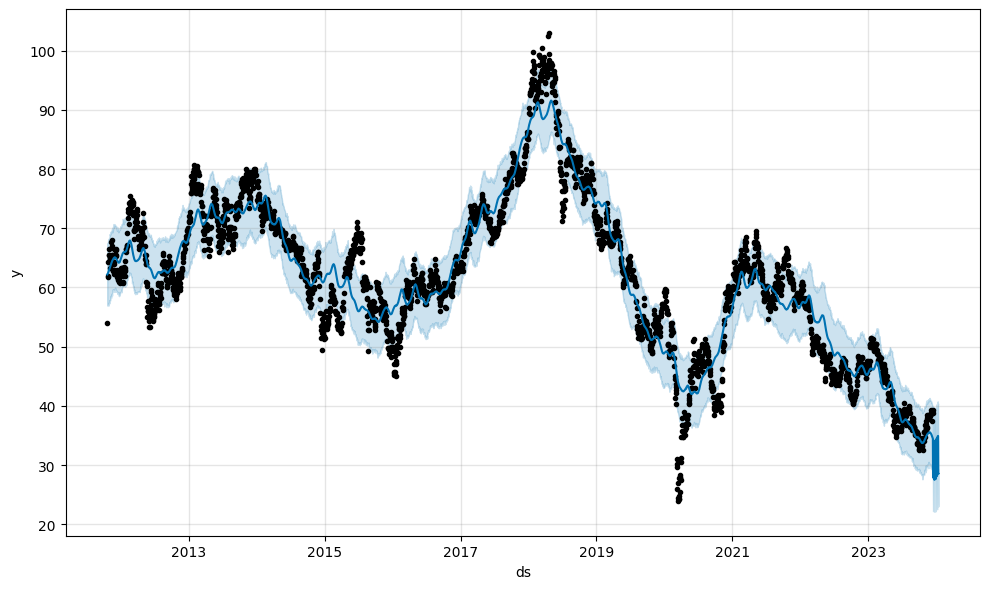

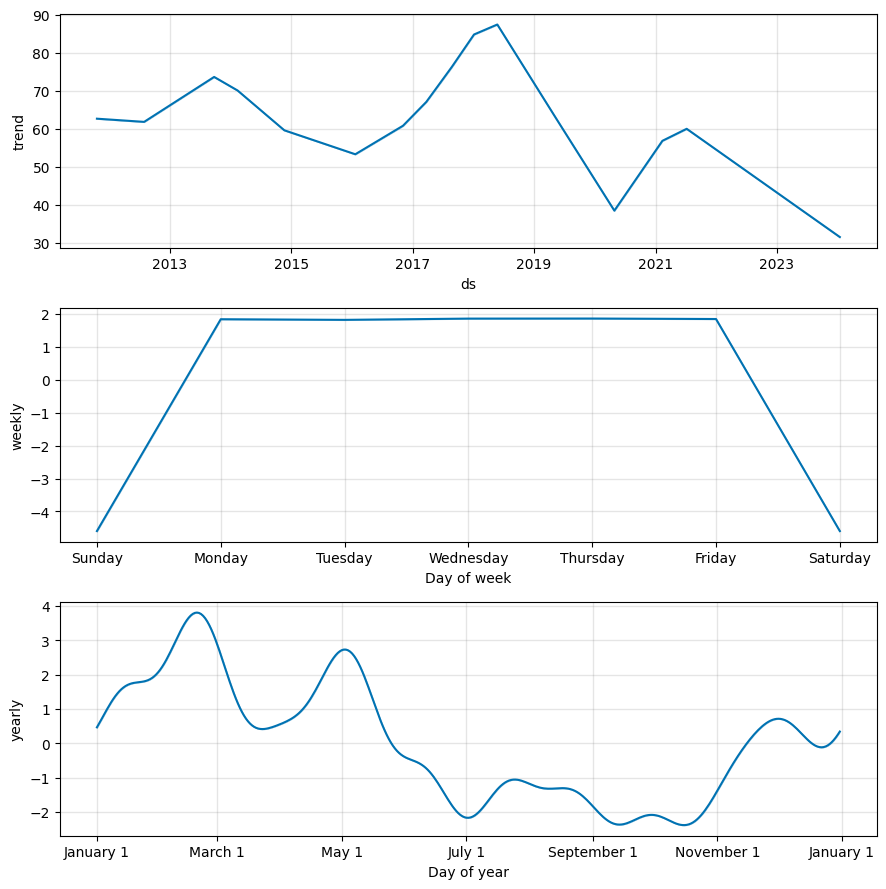

In [5]:
from prophet import Prophet

# Assuming "data" contains your prepared yfinance data

model = Prophet()
model.fit(data2)

future = model.make_future_dataframe(periods=30, freq="D")
forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)

print("PTTGC closing price forecast generated for the next 30 days!")

## TRAINING RECENT 5 YEARS RECORD

In [15]:
from datetime import datetime, timedelta

# Define the starting date for the past 5 years
five_years_ago = pd.to_datetime(datetime.today() - timedelta(days=365 * 5))

# Select data since that date
recent_data = data.loc[five_years_ago:]

# Alternatively, if the index is already datetime:
recent_data = data.loc[five_years_ago:]

recent_data.head()

,Close,Volume,SMA_50,Bollinger_Band_Upper,Bollinger_Band_Lower,ds,y
Date,,,,,,,
2018-12-19,72.0,23118000,77.390,98.905709,45.094291,2018-12-19,72.0
2018-12-20,72.0,15869800,77.215,98.905709,45.094291,2018-12-20,72.0
2018-12-21,74.0,19721500,77.130,100.905709,47.094291,2018-12-21,74.0
2018-12-24,73.0,8403000,77.035,99.905709,46.094291,2018-12-24,73.0
2018-12-25,71.5,5287200,76.875,98.405709,44.594291,2018-12-25,71.5


In [17]:
#Parameter for Prophet
data5yr = recent_data[["ds","y"]]
data5yr.head()

,ds,y
Date,,
2018-12-19,2018-12-19,72.0
2018-12-20,2018-12-20,72.0
2018-12-21,2018-12-21,74.0
2018-12-24,2018-12-24,73.0
2018-12-25,2018-12-25,71.5


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhp4i0_g/x490zxyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhp4i0_g/n_rbqmhs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19435', 'data', 'file=/tmp/tmpxhp4i0_g/x490zxyf.json', 'init=/tmp/tmpxhp4i0_g/n_rbqmhs.json', 'output', 'file=/tmp/tmpxhp4i0_g/prophet_model9fcezbo0/prophet_model-20231217152957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:29:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:29:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


PTTGC closing price forecast generated for the next 30 days!


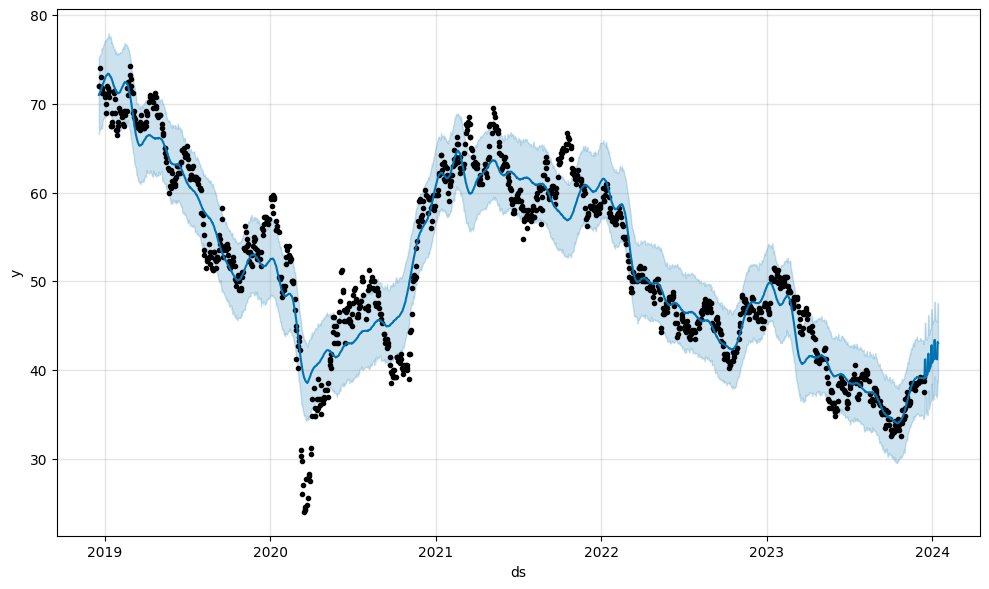

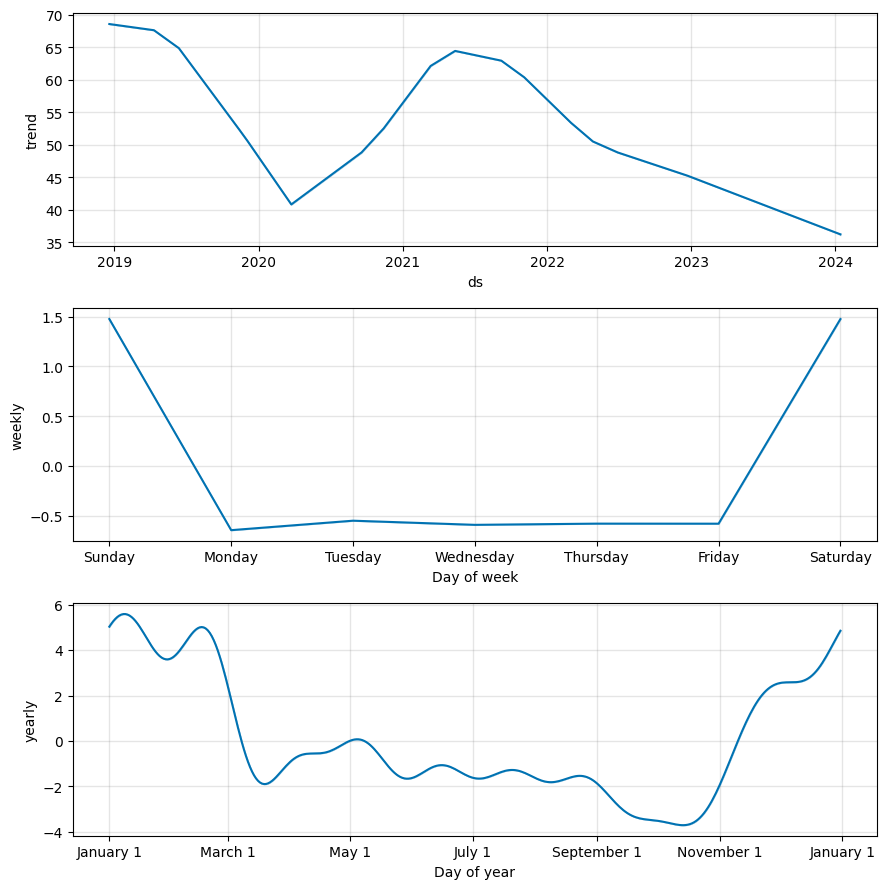

In [25]:
from prophet import Prophet

# Assuming "data" contains your prepared yfinance data

model = Prophet()
model.fit(data5yr)

future = model.make_future_dataframe(periods=30, freq="D")
forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)

print("PTTGC closing price forecast generated for the next 30 days!")

## TRAINING RECENT 2 YEARS RECORD

In [34]:
from datetime import datetime, timedelta

# Define the starting date for the past 5 years
five_years_ago = pd.to_datetime(datetime.today() - timedelta(days=365*2))

# Select data since that date
recent_data = data.loc[five_years_ago:]

# Alternatively, if the index is already datetime:
recent_data = data.loc[five_years_ago:]

#Parameter for Prophet
data2yr = recent_data[["ds","y"]]
data2yr.head()

,ds,y
Date,,
2021-12-20,2021-12-20,57.50
2021-12-21,2021-12-21,57.75
2021-12-22,2021-12-22,57.75
2021-12-23,2021-12-23,58.25
2021-12-24,2021-12-24,58.50


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhp4i0_g/g4su1ooo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhp4i0_g/qmvcbtdm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45194', 'data', 'file=/tmp/tmpxhp4i0_g/g4su1ooo.json', 'init=/tmp/tmpxhp4i0_g/qmvcbtdm.json', 'output', 'file=/tmp/tmpxhp4i0_g/prophet_modelnslzbcp3/prophet_model-20231217153541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:35:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:35:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


PTTGC closing price forecast generated for the next 30 days!


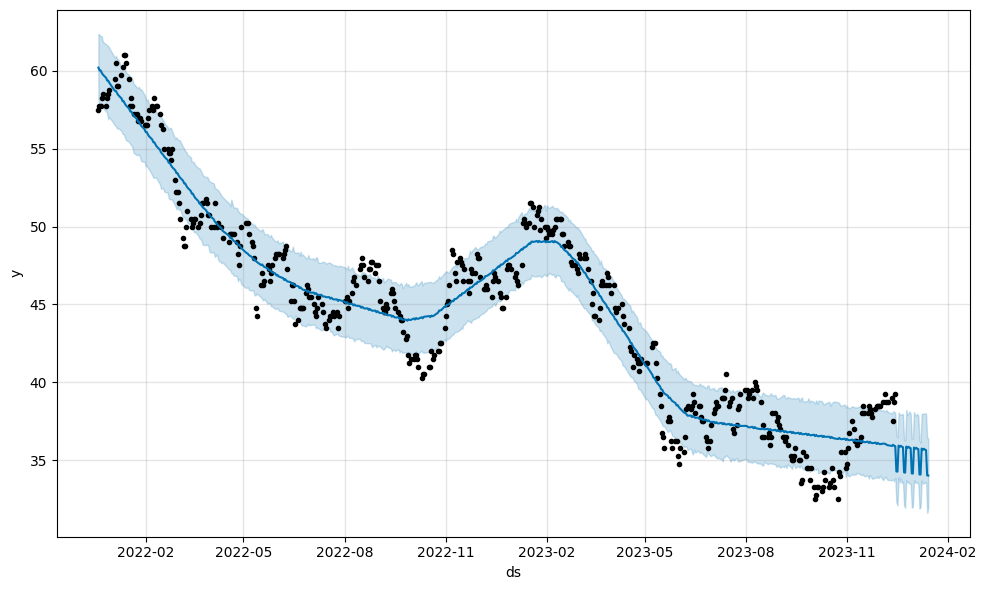

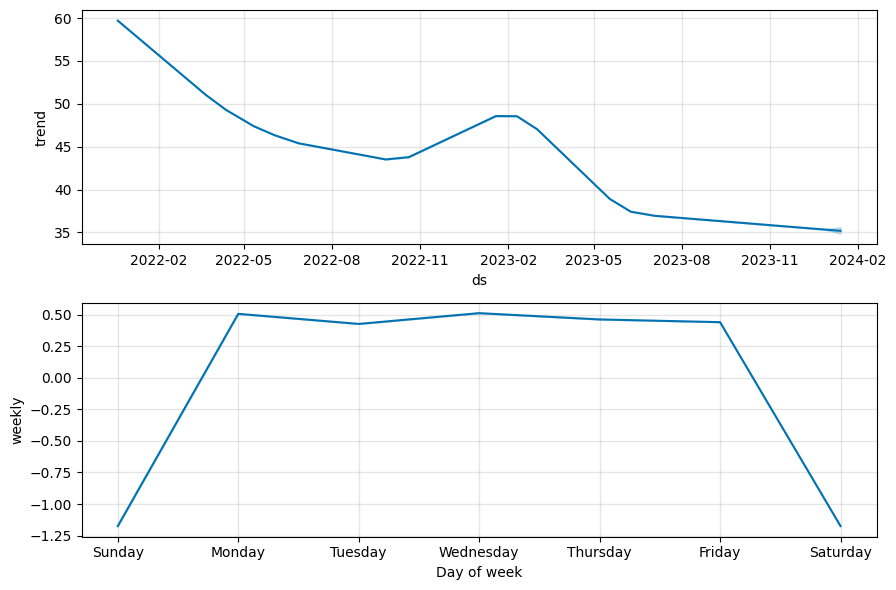

In [35]:
from prophet import Prophet

# Assuming "data" contains your prepared yfinance data

model = Prophet()
model.fit(data2yr)

future = model.make_future_dataframe(periods=30, freq="D")
forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)

print("PTTGC closing price forecast generated for the next 30 days!")